In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
results_dir = 'full_test_results_csv'
plots_dir = os.path.join(results_dir, 'plots')

if not os.path.isdir(results_dir):
    assert False, 'Results directory does not exist'
    
os.makedirs(plots_dir, exist_ok=True)

In [34]:
all_res_df = pd.DataFrame()

for res_file in os.listdir(results_dir):
    if not res_file.endswith('.csv'):
        continue
    
    ds = '_'.join(res_file.split('_')[:-1])
    res_df = pd.read_csv(os.path.join(results_dir, res_file))
    res_df.drop(columns=[res_df.columns[0]], inplace=True)
    res_df['dataset'] = ds
    res_df.rename(columns={'Random Forsest': 'Random Forest'}, inplace=True)
    
    if all_res_df.empty:
        all_res_df = res_df.iloc[:1]
    else:
        all_res_df = pd.concat([all_res_df, res_df[:1]], axis=0)

In [35]:
all_res_df

,XGBoost,Random Forest,AdaBoost,LGBM,Vanilla NN,NN with regularization,KNN,dataset
0,0.833333,0.785714,0.714286,0.809524,0.809524,0.833333,0.738095,sonar
0,0.846154,0.923077,0.820513,0.846154,0.871795,0.923077,0.923077,parkinson
0,0.808824,0.808824,0.500000,0.808824,0.617647,0.617647,0.779412,ecoli
0,0.956140,0.964912,0.929825,0.956140,0.964912,0.964912,0.982456,spam
0,0.935185,0.944444,0.870370,0.925926,0.935185,0.935185,0.935185,climate
0,0.727273,0.787879,0.575758,0.803030,0.681818,0.727273,0.757576,accent
0,0.982500,0.985000,0.762500,0.990000,0.977500,0.972500,0.987500,wifi
0,0.962264,0.981132,0.962264,0.735849,0.943396,0.924528,0.943396,rmftsa_ctoarrivals
0,0.956140,0.956140,0.929825,0.956140,0.964912,0.964912,0.982456,breast
0,0.962500,0.950000,0.925000,0.950000,0.937500,0.925000,0.925000,analcatdata_germangss


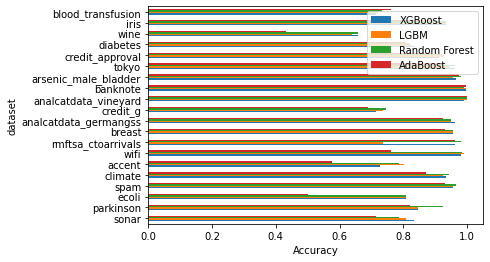

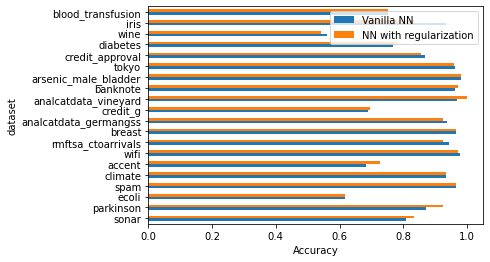

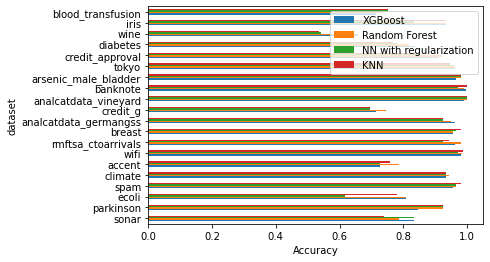

In [38]:
# create bar plots for each combination of results:
# - [XGBoost, LGBM, Random Forest, AdaBoost]
# - [Vanilla NN, NN with regularization]
# - [XGBoost, Random Forest, NN with regularization, KNN]

all_res_df.plot.barh(x='dataset', y=['XGBoost', 'LGBM', 'Random Forest', 'AdaBoost'], rot=0,
                     # stacked=True
                     )

plt.xlabel('Accuracy')
plt.savefig(os.path.join(plots_dir, 'ensemble_results.pdf'), bbox_inches='tight')
plt.show()

all_res_df.plot.barh(x='dataset', y=['Vanilla NN', 'NN with regularization'], rot=0,
                     # stacked=True
                     )

plt.xlabel('Accuracy')
plt.savefig(os.path.join(plots_dir, 'nn_results.pdf'), bbox_inches='tight')
plt.show()

all_res_df.plot.barh(x='dataset', y=['XGBoost', 'Random Forest', 'NN with regularization', 'KNN'], rot=0,
                     # stacked=True
                     )

plt.xlabel('Accuracy')
plt.savefig(os.path.join(plots_dir, 'main_results.pdf'), bbox_inches='tight')
plt.show()
